In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./data/train.csv')

test = pd.read_csv('./data/test.csv')

# Display the first few rows of the dataset
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0
0
Training data shape: (42000, 785)
Test data shape: (28000, 784)


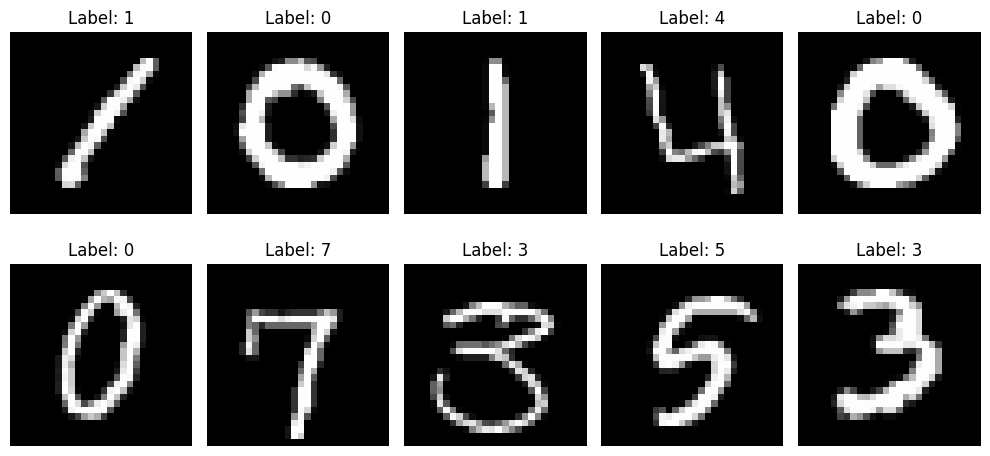

In [12]:
# Check for missing values
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

# Display the shape of the datasets
print("Training data shape:", train.shape)
print("Test data shape:", test.shape)

# Visualize sample images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax[i//5, i%5].imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax[i//5, i%5].set_title(f"Label: {train.iloc[i, 0]}")
    ax[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

# Normalize the pixel values
X = X / 255.0

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for CNN (if planning to use CNN later)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.reshape(-1, 28, 28, 1)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_log_reg = log_reg.predict(X_val)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log_reg))
print(confusion_matrix(y_val, y_pred_log_reg))
print(classification_report(y_val, y_pred_log_reg))


d:\AnaConda\envs\project\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9189285714285714
[[786   0   1   1   3  13  10   1   1   0]
 [  0 890   4   0   1   3   1   3   6   1]
 [  4  15 757  11  12   7  11   9  20   0]
 [  1   3  28 818   0  38   2   9  24  14]
 [  3   2   5   1 780   2  10   5   5  26]
 [  6   4   8  24  10 618  17   2   9   4]
 [  8   1   7   0   4   8 752   2   3   0]
 [  0   1  11   7  14   5   1 822   5  27]
 [  3  11   6  31   7  25   6   3 739   4]
 [  5   4   5  12  14   6   0  27   8 757]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.90      0.87      0.89       937
           4       0.92      0.93      0.93       839
           5       0.85      0.88      0.87       702
           6       0.93      0.96      0.94       785
           7       0.93      0.92      0.93       893
           8       0.90      0.89

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train the random forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf.predict(X_val)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


Random Forest Accuracy: 0.9622619047619048
[[804   0   0   2   1   1   4   0   3   1]
 [  0 902   3   0   1   0   2   1   0   0]
 [  3   5 812   2  10   0   4   4   6   0]
 [  1   2   6 883   1  16   0   8  10  10]
 [  1   0   0   0 812   0   5   2   1  18]
 [  2   1   2  10   1 667   8   0   6   5]
 [  6   1   1   0   2   3 767   0   5   0]
 [  0   3  12   3   4   0   0 854   2  15]
 [  1   4   4   8   8   4   4   2 791   9]
 [  2   3   3  15   8   3   0   9   4 791]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.96       839
           5       0.96      0.95      0.96       702
           6       0.97      0.98      0.97       785
           7       0.97      0.96      0.96       893
           8       0.96      0.95      

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val))

# Evaluate the model
cnn.evaluate(X_val_cnn, y_val)


d:\AnaConda\envs\project\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8237 - loss: 0.5375 - val_accuracy: 0.9783 - val_loss: 0.0704
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9672 - loss: 0.1039 - val_accuracy: 0.9819 - val_loss: 0.0559
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9768 - loss: 0.0756 - val_accuracy: 0.9851 - val_loss: 0.0485
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9821 - loss: 0.0562 - val_accuracy: 0.9858 - val_loss: 0.0400
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9883 - val_loss: 0.0362
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9872 - loss: 0.0406 - val_accuracy: 0.9868 - val_loss: 0.0503
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9882 - loss: 0.0372 - val_accuracy: 0.9905 - val_loss: 0.0314
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9915 -

[0.03584548830986023, 0.989047646522522]

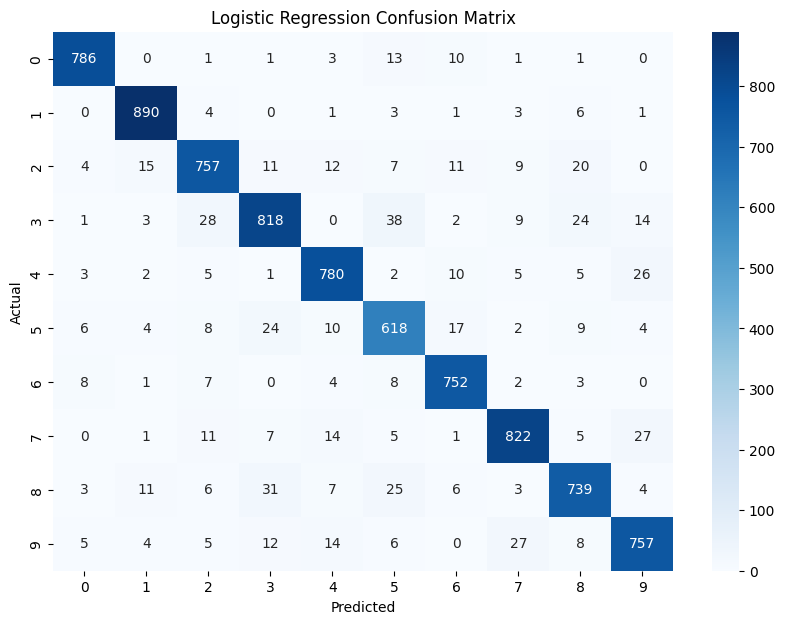

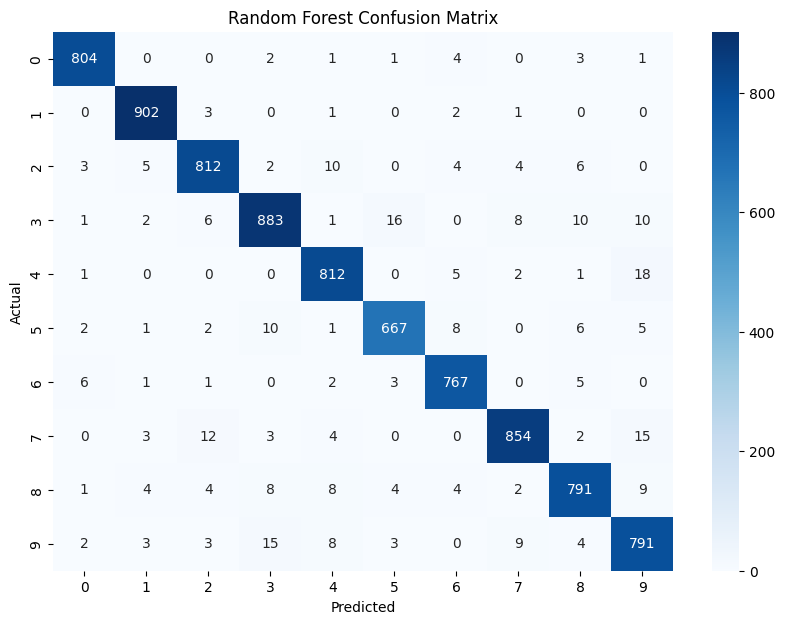

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


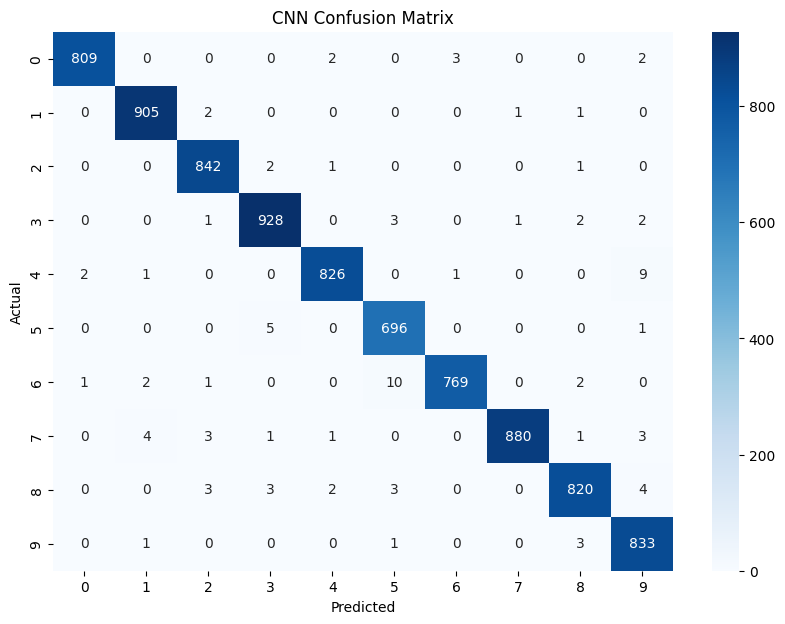

In [17]:
# Plot the confusion matrices for all models
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_val, y_pred_log_reg)
plot_confusion_matrix(cm_log_reg, "Logistic Regression Confusion Matrix")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")

# CNN Confusion Matrix (assuming you convert y_val and predictions to a suitable format if necessary)
y_pred_cnn = cnn.predict(X_val_cnn).argmax(axis=1)
cm_cnn = confusion_matrix(y_val, y_pred_cnn)
plot_confusion_matrix(cm_cnn, "CNN Confusion Matrix")


In [18]:
import joblib

# Save the best model
joblib.dump(rf, 'random_forest_model.pkl')
cnn.save('cnn_model.h5')
